# Dimensionality Reduction - Using PCA

- It is a technique used to reduce the number of features ina  dataset - while preserving as much information as possible.
- Advantages:
    - Improving computational efficiency: having less features improves the speed of the ML algorithm
    - Visualizing the data: multi-dimensional data is hard/impossible to visualize in one plot. Using PCA we can visualize the data in 2D.
    - Reducing noise and overfitting: by reducing the complexity and unnecessary details, you reduce the overfitting of the model
- Applications:
    - Improving visualization
    - Image compression: reducing the dimensionality and focusing on the important features in the image
    - Text analysis: reducing the dimensionality of text data for sentiment analysis
- Types:
    - PCA (Principal Component Analysis)
    - t-SNE (t-distribution Stochastic Neighbor Embedding)
    - UMAP
    - Autoencoders
- When to avoid PCA:
    - When the variance analysis yields lower score for the PCA (we'll explore that later)
    - When the number of features is already low
    - When the data is not close to normal distribution (outlier treatment is recommended)

> It's recommended to standardize the data before PCA

![PCA](https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
X =pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Step 1 - Standardize the data

In [5]:
SS = StandardScaler()
X_scaled = SS.fit_transform(X)
X_scaled[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

Step 2 - Apply PCA

In [6]:
X_scaled.shape

(569, 30)

In this exercise, we're going to reduce the number of features to 2.

In [7]:
#define the num of components 
pca_model_2 = PCA(n_components=2)

In [8]:
#apply on our data
X_scaler_2_pca = pca_model_2.fit_transform(X_scaled)

In [9]:
X_scaler_2_pca.shape

(569, 2)

In [10]:
X_scaler_2_pca[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

## PCA Explained Variance Analysis

- Purpose:
    - Analyze the impact of reducing from 30 to 2 features (Visualization)
    - Helps choose the optimal number of PCs for dimensionality reduction (Performance)
- Steps to perform the Explained Variance Analysis:
    1. Build PCA for max number of components (same as number of all features)
    2. Fit the data
    3. Calculate the cumulative sum (running total) of the **8*Explained Variance Ratio (EVR)**
    4. Plot the results
    5. Choose the optimal number - where the curve is closer to 1 and flattens

In [11]:
#step 1
pca_model_full = PCA()

#step 2
pca_model_full.fit(X_scaled)


PCA()

In [12]:
#step 3
pca_evr = pca_model_full.explained_variance_ratio_

#calculate the running total
pca_evr_cumsum = np.cumsum(pca_evr)

Tabular Evaluation

In [13]:
df_pca_evr = pd.DataFrame({'Principal Component':range(1,31),
                           'PC EVR': pca_evr,
                           'PC EVR CumSum': pca_evr_cumsum})
df_pca_evr

,Principal Component,PC EVR,PC EVR CumSum
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343
5,6,0.040245,0.887588
6,7,0.022507,0.910095
7,8,0.015887,0.925983
8,9,0.013896,0.939879
9,10,0.011690,0.951569


Visual Evaluation

Text(0, 0.5, 'Explained Variance Ratio (CumSum)')

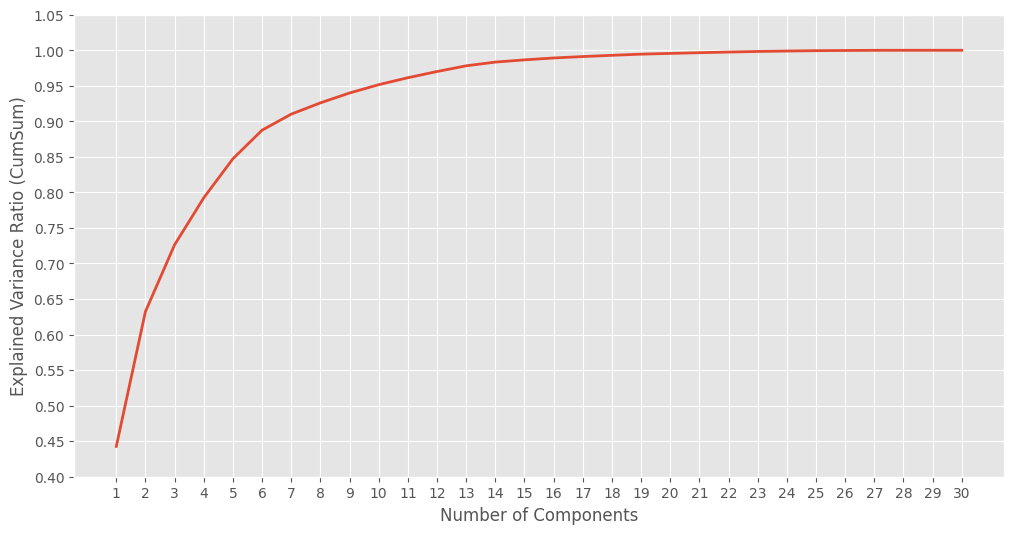

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))

plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR CumSum'], linewidth=2)
plt.xticks(df_pca_evr['Principal Component'])
plt.yticks(np.arange(0.4,1.1,.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio (CumSum)')

- 95% of the variance is captured with ~10 components
- PC from 18 and above, we have very insignificant loss of information
- The curve starts to flatten after PC 13
- Use Case:
    - If the goal is to build 2D visualization: 0.632432 of variance explained
    - If the goal is to have a trade off between reducing dimensions to improve performance vs avoiding big loss of info,  10 PCs will give us 0.951569 of the variance, which is a nice trade-off.
- Variance is small in later PCs, and that means there is more chance of overfitting

Text(0, 0.5, 'Explained Variance Ratio')

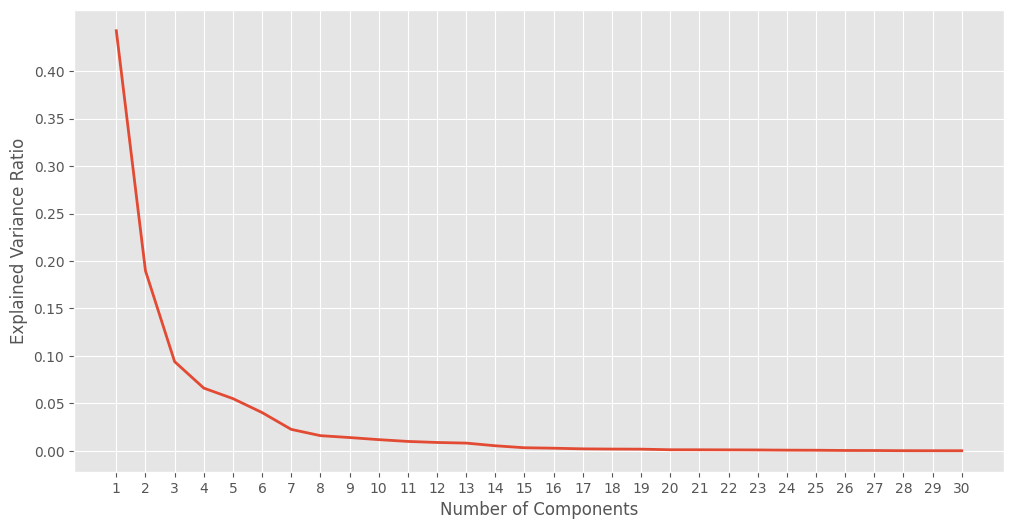

In [15]:
plt.figure(figsize=(12,6))

plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR'], linewidth=2)
plt.xticks(df_pca_evr['Principal Component'])
plt.yticks(np.arange(0,.45,.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

Visualize 2PCs

Text(0, 0.5, 'Second Principal Component')

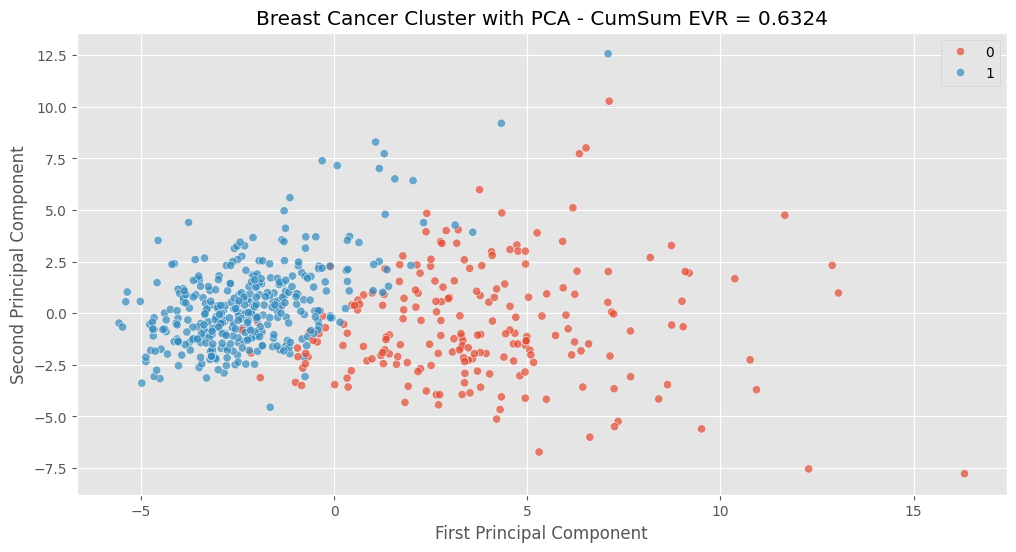

In [16]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=X_scaler_2_pca[:,0], y=X_scaler_2_pca[:,1], hue=cancer_data['target'], alpha=0.7)

plt.title(f"Breast Cancer Cluster with PCA - CumSum EVR = {df_pca_evr['PC EVR CumSum'][1]:.4f}")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


## PCA Loadings
- They are used to understand the relationship between the original features in the data and the newly built PCs
- They help interpret how much each "original" feature contributes to each PC
- Performing loadings analysis generates the **Loadings Matrix**

In [17]:
pca_2_loadings = pca_model_2.components_
pca_2_loadings

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [19]:

print('Loadings of PC 1:\n',pca_2_loadings[0])
print('----')
print('Loadings of PC 2:\n',pca_2_loadings[1])

Loadings of PC 1:
 [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
----
Loadings of PC 2:
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [26]:
#build loadings matrix dataframe
loadings_matrix = pd.DataFrame(pca_2_loadings, columns=X.columns)
loadings_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [28]:
loadings_matrix = loadings_matrix.T
loadings_matrix.columns = ['PC1','PC2']
loadings_matrix

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


PCA Loadings Matrix Interpretation:
- The loadings represent how much each original feature contributes to the principal component (PC1 or PC2). 
- A higher absolute value indicates a stronger influence of that feature.
- For PC1, Mean Concave Point has the highest influence (0.260854)
- For PC2, it's Mean Fractal Dimension (0.366575)
- We can use python to identify the top 3 features for each component:

In [ ]:
top_3_loadings = loadings_matrix.apply(lambda x: x.abs().nlargest(3).index)
top_3_loadings

,PC1,PC2
0,mean concave points,mean fractal dimension
1,mean concavity,fractal dimension error
2,worst concave points,worst fractal dimension


In [32]:
top_3_loadings_val = loadings_matrix.apply(lambda x: x.abs().nlargest(3).values)
top_3_loadings_val


,PC1,PC2
0,0.260854,0.366575
1,0.258400,0.280092
2,0.250886,0.275339


Text(0, 0.5, "Second PC ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension']")

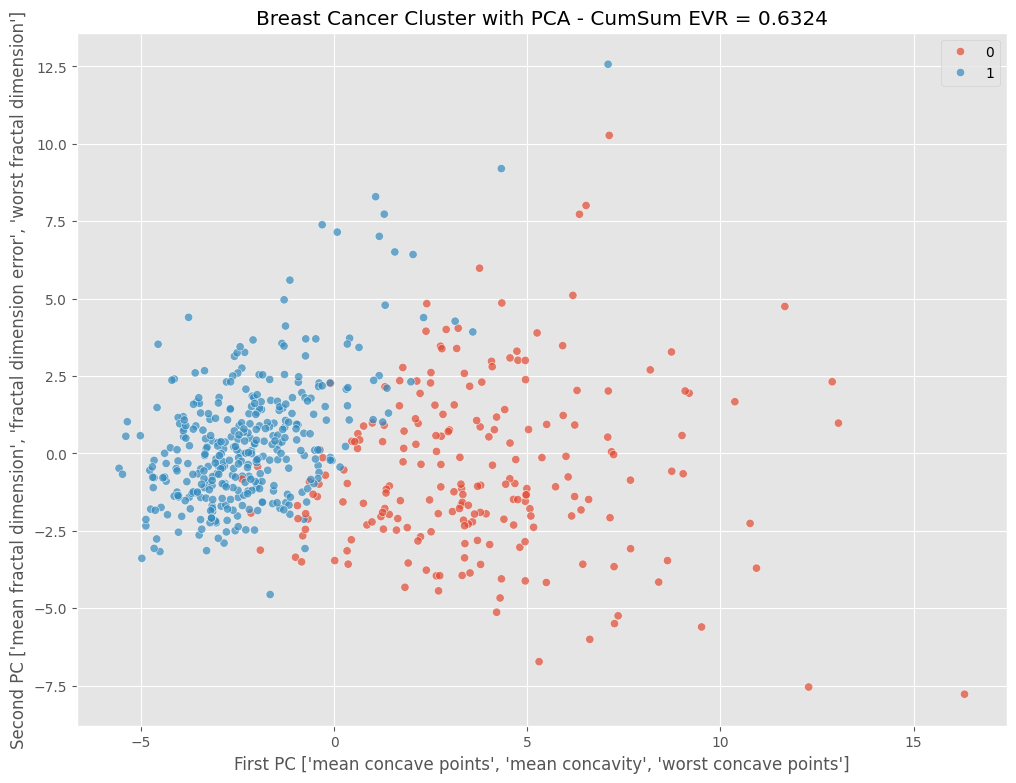

In [38]:
plt.figure(figsize=(12,9))

sns.scatterplot(x=X_scaler_2_pca[:,0], y=X_scaler_2_pca[:,1], hue=cancer_data['target'], alpha=0.7)

plt.title(f"Breast Cancer Cluster with PCA - CumSum EVR = {df_pca_evr['PC EVR CumSum'][1]:.4f}")
plt.xlabel(f"First PC {top_3_loadings['PC1'].values.tolist()}")
plt.ylabel(f"Second PC {top_3_loadings['PC2'].values.tolist()}")


In [39]:
top_3_loadings

,PC1,PC2
0,mean concave points,mean fractal dimension
1,mean concavity,fractal dimension error
2,worst concave points,worst fractal dimension
